# Homework 6
*This notebook includes both coding and written questions. Please hand in this notebook file with all the outputs and your answers to the written questions.*

This assignment covers K-Means and HAC methods for clustering and image segmentation.

In [ ]:
import os

if not os.path.exists("CS131_release"):
    # Clone the repository if it doesn't already exist
    !git clone https://github.com/StanfordVL/CS131_release.git

In [ ]:
%cd CS131_release/winter_2025/hw6_release/

In [3]:
# Setup
from __future__ import print_function
from time import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from skimage import io
from scipy.spatial.distance import squareform, pdist, cdist
from skimage.util import img_as_float
import os
from skimage import transform

%matplotlib inline
plt.rcParams['figure.figsize'] = (15.0, 12.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
%load_ext autoreload
%autoreload 2

## Introduction
In this assignment, you will use clustering algorithms to segment images. You will then use these segmentations to identify foreground and background objects.

Your assignment will involve the following subtasks:
- **Clustering algorithms**: Implement K-Means clustering and Hierarchical Agglomerative Clustering.
- **Pixel-level features**: Implement a feature vector that combines color and position information and implement feature normalization.
- **Quantitative Evaluation**: Evaluate segmentation algorithms with a variety of parameter settings by comparing your computed segmentations against a dataset of ground-truth segmentations.

## 1 Clustering Algorithms (40 points)

In [ ]:
# Generate random data points for clustering

# Set seed for consistency
np.random.seed(0)

# Cluster 1
mean1 = [-1, 0]
cov1 = [[0.1, 0], [0, 0.1]]
X1 = np.random.multivariate_normal(mean1, cov1, 100)

# Cluster 2
mean2 = [0, 1]
cov2 = [[0.1, 0], [0, 0.1]]
X2 = np.random.multivariate_normal(mean2, cov2, 100)

# Cluster 3
mean3 = [1, 0]
cov3 = [[0.1, 0], [0, 0.1]]
X3 = np.random.multivariate_normal(mean3, cov3, 100)

# Cluster 4
mean4 = [0, -1]
cov4 = [[0.1, 0], [0, 0.1]]
X4 = np.random.multivariate_normal(mean4, cov4, 100)

# Merge two sets of data points
X = np.concatenate((X1, X2, X3, X4))

# Plot data points
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal')
plt.show()

### 1.1 K-Means Clustering (20 points)
As discussed in class, K-Means is one of the most popular clustering algorithms. We have provided pseudo code for K-Means clustering below. Your first task is to finish implementing **`kmeans`**. This version uses nested for loops to assign points to the closest centroid and compute a new mean for each cluster.

In [5]:
def kmeans(features, k, num_iters=100):
    """ Use kmeans algorithm to group features into k clusters.

    K-Means algorithm can be broken down into following steps:
        1. Randomly initialize cluster centers
        2. Assign each point to the closest center
        3. Compute new center of each cluster
        4. Stop if cluster assignments did not change
        5. Go to step 2

    Args:
        features - Array of N features vectors. Each row represents a feature
            vector.
        k - Number of clusters to form.
        num_iters - Maximum number of iterations the algorithm will run.

    Returns:
        assignments - Array representing cluster assignment of each point.
            (e.g. i-th point is assigned to cluster assignments[i])
    """

    N, D = features.shape

    assert N >= k, 'Number of clusters cannot be greater than number of points'

    # Randomly initalize cluster centers
    idxs = np.random.choice(N, size=k, replace=False)
    centers = features[idxs]
    assignments = np.zeros(N, dtype=np.uint32)

    for n in range(num_iters):
        ### YOUR CODE HERE
       pass
        ### END YOUR CODE

    return assignments

In [ ]:
np.random.seed(0)
start = time()
assignments = kmeans(X, 4)
end = time()

kmeans_runtime = end - start

print("kmeans running time: %f seconds." % kmeans_runtime)

for i in range(4):
    cluster_i = X[assignments==i]
    plt.scatter(cluster_i[:, 0], cluster_i[:, 1])

plt.axis('equal')
plt.show()

We can use numpy functions and broadcasting to make K-Means faster. Implement **`kmeans_fast`**. This should run at least 10 times faster than the previous implementation.

In [7]:
def kmeans_fast(features, k, num_iters=100):
    """ Use kmeans algorithm to group features into k clusters.

    This function makes use of numpy functions and broadcasting to speed up the
    first part(cluster assignment) of kmeans algorithm.

    Hints
    - You may find cdist (imported from scipy.spatial.distance) and np.argmin useful

    Args:
        features - Array of N features vectors. Each row represents a feature
            vector.
        k - Number of clusters to form.
        num_iters - Maximum number of iterations the algorithm will run.

    Returns:
        assignments - Array representing cluster assignment of each point.
            (e.g. i-th point is assigned to cluster assignments[i])
    """

    N, D = features.shape

    assert N >= k, 'Number of clusters cannot be greater than number of points'

    # Randomly initalize cluster centers
    idxs = np.random.choice(N, size=k, replace=False)
    centers = features[idxs]
    assignments = np.zeros(N, dtype=np.uint32)

    for n in range(num_iters):
        ### YOUR CODE HERE
        pass
        ### END YOUR CODE

    return assignments

In [ ]:
np.random.seed(0)
start = time()
assignments = kmeans_fast(X, 4)
end = time()

kmeans_fast_runtime = end - start
print("kmeans running time: %f seconds." % kmeans_fast_runtime)
print("%f times faster!" % (kmeans_runtime / kmeans_fast_runtime))

for i in range(4):
    cluster_i = X[assignments==i]
    plt.scatter(cluster_i[:, 0], cluster_i[:, 1])

plt.axis('equal')
plt.show()

### 1.2 K-Means Convergence (10 points)
Implementations of the K-Means algorithm will often have the parameter `num_iters` to define the maximum number of iterations the algorithm should run for. Consider that we opt to not include this upper bound on the number of iterations, and that we define the termination criterion of the algorithm to be when the cost $L$ stops changing.

Recall that $L$ is defined as the sum of squared distance between all points $x$ and their nearest cluster center $c$:

$$L = \sum_{i \in clusters}\sum_{x \in cluster_i} (x - c_i)^2$$

Show that for any set of points **$D$** and any number of clusters $k$, the K-Means algorithm will terminate in a finite number of iterations.

**Your answer here:**


### 1.3 Hierarchical Agglomerative Clustering (10 points)
Another simple clustering algorithm is Hieararchical Agglomerative Clustering, which is somtimes abbreviated as HAC. In this algorithm, each point is initially assigned to its own cluster. Then cluster pairs are merged until we are left with the desired number of predetermined clusters (see Algorithm 1).

Implement **`hiererachical_clustering`**.

<!-- 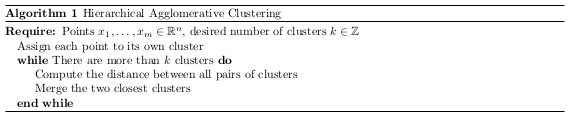 -->

In [9]:
def hierarchical_clustering(features, k):
    """ Run the hierarchical agglomerative clustering algorithm.

    The algorithm is conceptually simple:

    Assign each point to its own cluster
    While the number of clusters is greater than k:
        Compute the distance between all pairs of clusters
        Merge the pair of clusters that are closest to each other

    We will use Euclidean distance to define distance between clusters.

    Recomputing the centroids of all clusters and the distances between all
    pairs of centroids at each step of the loop would be very slow. Thankfully
    most of the distances and centroids remain the same in successive
    iterations of the outer loop; therefore we can speed up the computation by
    only recomputing the centroid and distances for the new merged cluster.

    Even with this trick, this algorithm will consume a lot of memory and run
    very slowly when clustering large set of points. In practice, you probably
    do not want to use this algorithm to cluster more than 10,000 points.

    Hints
    - You may find pdist (imported from scipy.spatial.distance) useful

    Args:
        features - Array of N features vectors. Each row represents a feature
            vector.
        k - Number of clusters to form.

    Returns:
        assignments - Array representing cluster assignment of each point.
            (e.g. i-th point is assigned to cluster assignments[i])
    """



    N, D = features.shape

    assert N >= k, 'Number of clusters cannot be greater than number of points'

    # Assign each point to its own cluster
    assignments = np.arange(N, dtype=np.uint32)
    centers = np.copy(features)
    n_clusters = N

    # Initial distances array
    dists = squareform(pdist(centers))
    np.fill_diagonal(dists, float('inf'))
    assert dists.shape == (N, N)

    while n_clusters > k:
        ### YOUR CODE HERE
        pass
        ### END YOUR CODE

    return assignments

In [ ]:
start = time()
assignments = hierarchical_clustering(X, 4)
end = time()

print("hierarchical_clustering running time: %f seconds." % (end - start))

for i in range(4):
    cluster_i = X[assignments==i]
    plt.scatter(cluster_i[:, 0], cluster_i[:, 1])

plt.axis('equal')
plt.show()

## 2 Pixel-Level Features (30 points)
Before we can use a clustering algorithm to segment an image, we must compute some *feature vector* for each pixel. The feature vector for each pixel should encode the qualities that we care about in a good segmentation. More concretely, for a pair of pixels $p_i$ and $p_j$ with corresponding feature vectors $f_i$ and $f_j$, the distance between $f_i$ and $f_j$ should be small if we believe that $p_i$ and $p_j$ should be placed in the same segment and large otherwise.

In [ ]:
# Load and display image
img = io.imread('train.jpg')
H, W, C = img.shape

plt.imshow(img)
plt.axis('off')
plt.show()

### 2.1 Color Features (15 points)
One of the simplest possible feature vectors for a pixel is simply the vector of colors for that pixel. Implement **`color_features`**. Output should look like the following:

In [ ]:
plt.imshow(io.imread('color_features.png'))
plt.title('Segmentation Solution')
plt.axis('off')
plt.show()

In [13]:
### Pixel-Level Features
def color_features(img):
    """ Represents a pixel by its color.

    Args:
        img - array of shape (H, W, C)

    Returns:
        features - array of (H * W, C)
    """
    H, W, C = img.shape
    img = img_as_float(img)
    features = np.zeros((H*W, C))

    ### YOUR CODE HERE
    pass
    ### END YOUR CODE

    return features

In [ ]:
np.random.seed(0)

features = color_features(img)

# Sanity checks
assert features.shape == (H * W, C),\
    "Incorrect shape! Check your implementation."

assert features.dtype == float,\
    "dtype of color_features should be float."

assignments = kmeans_fast(features, 8)
segments = assignments.reshape((H, W))

# Display segmentation
plt.imshow(segments, cmap='viridis')
plt.axis('off')
plt.show()



In the cell below, we visualize each segment as the mean color of pixels in the segment.

In [15]:
def visualize_mean_color_image(img, segments):

    img = img_as_float(img)
    k = np.max(segments) + 1
    mean_color_img = np.zeros(img.shape)

    for i in range(k):
        mean_color = np.mean(img[segments == i], axis=0)
        mean_color_img[segments == i] = mean_color

    plt.imshow(mean_color_img)
    plt.axis('off')
    plt.show()

In [ ]:
visualize_mean_color_image(img, segments)

### 2.2 Color and Position Features (15 points)
Another simple feature vector for a pixel is to concatenate its color and position within the image. In other words, for a pixel of color $(r, g, b)$ located at position $(x, y)$ in the image, its feature vector would be $(r, g, b, x, y)$. However, the color and position features may have drastically different ranges; for example each color channel of an image may be in the range $[0, 1)$, while the position of each pixel may have a much wider range. Uneven scaling between different features in the feature vector may cause clustering algorithms to behave poorly.

One way to correct for uneven scaling between different features is to apply some sort of normalization to the feature vector. One of the simplest types of normalization is to force each feature to have zero mean and unit variance.

Implement **`color_position_features`**.

Output segmentation should look like the following:

In [ ]:
plt.imshow(io.imread('color_position_features.png'))
plt.title('Segmentation Solution')
plt.axis('off')
plt.show()

In [18]:
def color_position_features(img):
    """ Represents a pixel by its color and position.

    Combine pixel's RGB value and xy coordinates into a feature vector.
    i.e. for a pixel of color (r, g, b) located at position (x, y) in the
    image. its feature vector would be (r, g, b, x, y).

    Don't forget to normalize features.

    Hints
    - You may find np.mgrid and np.dstack useful
    - You may use np.mean and np.std

    Args:
        img - array of shape (H, W, C)

    Returns:
        features - array of (H * W, C+2)
    """
    H, W, C = img.shape
    color = img_as_float(img)
    features = np.zeros((H*W, C+2))

    ### YOUR CODE HERE
    pass
    ### END YOUR CODE

    return features

In [ ]:
np.random.seed(0)

features = color_position_features(img)

# Sanity checks
assert features.shape == (H * W, C + 2),\
    "Incorrect shape! Check your implementation."

assert features.dtype == float,\
    "dtype of color_features should be float."

assignments = kmeans_fast(features, 8)
segments = assignments.reshape((H, W))

# Display segmentation
plt.imshow(segments, cmap='viridis')
plt.axis('off')
plt.show()

In [ ]:
visualize_mean_color_image(img, segments)

### Extra Credit: Implement Your Own Feature
For this programming assignment we have asked you to implement a very simple feature transform for each pixel. While it is not required, you should feel free to experiment with other feature transforms. Could your final segmentations be improved by adding gradients, edges, SIFT descriptors, or other information to your feature vectors? Could a different type of normalization give better results?

Implement your feature extractor **`my_features`**.

Depending on the creativity of your approach and the quality of your writeup, implementing extra feature vectors can be worth extra credit (up to 1% of final grade).

**Describe your approach**: (YOUR APPROACH)

In [22]:

def my_features(img):
    """ Implement your own features

    Args:
        img - array of shape (H, W, C)

    Returns:
        features - array of (H * W, C)
    """
    features = None
    ### YOUR CODE HERE
    pass
    ### END YOUR CODE
    return features


In [ ]:
# Feel free to experiment with different images
# and varying number of segments
img = io.imread('train.jpg')
num_segments = 8

H, W, C = img.shape

# Extract pixel-level features
features = my_features(img)

# Run clustering algorithm
assignments = kmeans_fast(features, num_segments)

segments = assignments.reshape((H, W))

# Display segmentation
plt.imshow(segments, cmap='viridis')
plt.axis('off')
plt.show()

## 3 Quantitative Evaluation (30 points)

Looking at images is a good way to get an idea for how well an algorithm is working, but the best way to evaluate an algorithm is to have some quantitative measure of its performance.

For this project we have supplied a small dataset of cat images and ground truth segmentations of these images into foreground (cats) and background (everything else). We will quantitatively evaluate different segmentation methods (features and clustering methods) on this dataset.

We can cast the segmentation task into a binary classification problem, where we need to classify each pixel in an image into either foreground (positive) or background (negative). Given the ground-truth labels, the accuracy of a segmentation is $(TP+TN)/(P+N)$.

Implement **`compute_accuracy`**.

In [24]:
def compute_accuracy(mask_gt, mask):
    """ Compute the pixel-wise accuracy of a foreground-background segmentation
        given a ground truth segmentation.

    Args:
        mask_gt - The ground truth foreground-background segmentation. A
            logical of size H x W where mask_gt[y, x] is 1 if and only if
            pixel (y, x) of the original image was part of the foreground.
        mask - The estimated foreground-background segmentation. A logical
            array of the same size and format as mask_gt.

    Returns:
        accuracy - The fraction of pixels where mask_gt and mask agree. A
            bigger number is better, where 1.0 indicates a perfect segmentation.
    """

    accuracy = None
    ### YOUR CODE HERE
    pass
    ### END YOUR CODE

    return accuracy

In [ ]:
mask_gt = np.zeros((100, 100))
mask = np.zeros((100, 100))

# Test compute_accracy function
mask_gt[20:50, 30:60] = 1
mask[30:50, 30:60] = 1

accuracy = compute_accuracy(mask_gt, mask)

print('Accuracy: %0.2f' % (accuracy))
if accuracy != 0.97:
    print('Check your implementation!')

plt.subplot(121)
plt.imshow(mask_gt)
plt.title('Ground Truth')
plt.axis('off')

plt.subplot(122)
plt.imshow(mask)
plt.title('Estimate')
plt.axis('off')

plt.show()

You can use the script below to evaluate a segmentation method’s ability to separate foreground from background on the entire provided dataset. Use this script as a starting point to evaluate a variety of segmentation parameters.

In [28]:
def evaluate_segmentation(mask_gt, segments):
    """ Compare the estimated segmentation with the ground truth.

    Note that 'mask_gt' is a binary mask, while 'segments' contain k segments.
    This function compares each segment in 'segments' with the ground truth and
    outputs the accuracy of the best segment.

    Args:
        mask_gt - The ground truth foreground-background segmentation. A
            logical of size H x W where mask_gt[y, x] is 1 if and only if
            pixel (y, x) of the original image was part of the foreground.
        segments - An array of the same size as mask_gt. The value of a pixel
            indicates the segment it belongs.

    Returns:
        best_accuracy - Accuracy of the best performing segment.
            0 <= accuracy <= 1, where 1.0 indicates a perfect segmentation.
    """

    num_segments = np.max(segments) + 1
    best_accuracy = 0

    # Compare each segment in 'segments' with the ground truth
    for i in range(num_segments):
        mask = (segments == i).astype(int)
        accuracy = compute_accuracy(mask_gt, mask)
        best_accuracy = max(accuracy, best_accuracy)

    return best_accuracy

def load_dataset(data_dir):
    """
    This function assumes 'gt' directory contains ground truth segmentation
    masks for images in 'imgs' dir. The segmentation mask for image
    'imgs/aaa.jpg' is 'gt/aaa.png'
    """

    imgs = []
    gt_masks = []

    # Load all the images under 'data_dir/imgs' and corresponding
    # segmentation masks under 'data_dir/gt'.
    for fname in sorted(os.listdir(os.path.join(data_dir, 'imgs'))):
        if fname.endswith('.jpg'):
            # Load image
            img = io.imread(os.path.join(data_dir, 'imgs', fname))
            imgs.append(img)

            # Load corresponding gt segmentation mask
            mask_fname = fname[:-4] + '.png'
            gt_mask = io.imread(os.path.join(data_dir, 'gt', mask_fname))
            gt_mask = (gt_mask != 0).astype(int) # Convert to binary mask (0s and 1s)
            gt_masks.append(gt_mask)

    return imgs, gt_masks

def compute_segmentation(img, k,
        clustering_fn=kmeans_fast,
        feature_fn=color_position_features,
        scale=0):
    """ Compute a segmentation for an image.

    First a feature vector is extracted from each pixel of an image. Next a
    clustering algorithm is applied to the set of all feature vectors. Two
    pixels are assigned to the same segment if and only if their feature
    vectors are assigned to the same cluster.

    Args:
        img - An array of shape (H, W, C) to segment.
        k - The number of segments into which the image should be split.
        clustering_fn - The method to use for clustering. The function should
            take an array of N points and an integer value k as input and
            output an array of N assignments.
        feature_fn - A function used to extract features from the image.
        scale - (OPTIONAL) parameter giving the scale to which the image
            should be in the range 0 < scale <= 1. Setting this argument to a
            smaller value will increase the speed of the clustering algorithm
            but will cause computed segments to be blockier. This setting is
            usually not necessary for kmeans clustering, but when using HAC
            clustering this parameter will probably need to be set to a value
            less than 1.
    """

    assert scale <= 1 and scale >= 0, \
        'Scale should be in the range between 0 and 1'

    H, W, C = img.shape

    if scale > 0:
        # Scale down the image for faster computation.
        img = transform.rescale(img, scale)

    features = feature_fn(img)
    assignments = clustering_fn(features, k)
    segments = assignments.reshape((img.shape[:2]))

    if scale > 0:
        # Resize segmentation back to the image's original size
        segments = transform.resize(segments, (H, W), preserve_range=True)

        # Resizing results in non-interger values of pixels.
        # Round pixel values to the closest interger
        segments = np.rint(segments).astype(int)

    return segments


In [ ]:
# Load a small segmentation dataset
imgs, gt_masks = load_dataset('./data')

# Set the parameters for segmentation.
num_segments = 3
clustering_fn = kmeans_fast
feature_fn = color_features
scale = 0.5

mean_accuracy = 0.0

segmentations = []

for i, (img, gt_mask) in enumerate(zip(imgs, gt_masks)):
    # Compute a segmentation for this image
    segments = compute_segmentation(img, num_segments,
                                    clustering_fn=clustering_fn,
                                    feature_fn=feature_fn,
                                    scale=scale)
    
    segmentations.append(segments)
    
    # Evaluate segmentation
    accuracy = evaluate_segmentation(gt_mask, segments)
    
    print('Accuracy for image %d: %0.4f' %(i, accuracy))
    mean_accuracy += accuracy
    
mean_accuracy = mean_accuracy / len(imgs)
print('Mean accuracy: %0.4f' % mean_accuracy)

In [ ]:
# Visualize segmentation results

N = len(imgs)
plt.figure(figsize=(15,60))
for i in range(N):

    plt.subplot(N, 3, (i * 3) + 1)
    plt.imshow(imgs[i])
    plt.axis('off')

    plt.subplot(N, 3, (i * 3) + 2)
    plt.imshow(gt_masks[i])
    plt.axis('off')

    plt.subplot(N, 3, (i * 3) + 3)
    plt.imshow(segmentations[i], cmap='viridis')
    plt.axis('off')

plt.show()

Include a detailed evaluation of the effect of varying segmentation parameters (feature transform, clustering method, number of clusters, resize) on the mean accuracy of foreground-background segmentations on the provided dataset. You should test a minimum of 6 combinations of parameters. To present your results, add rows to the table below (you may delete the first row).

**One tip from us** is that it's okay to avoid using hierarchical clustering altogether. The HAC algorithm is quite slow for larger scales. It is totally fine to just K-Means and modulate the other parameters of the clustering function!

 <table style="width:100%">
  <tr>
    <th>Feature Transform</th>
    <th>Clustering Method</th>
    <th>Number of segments</th>
    <th>Scale</th>
    <th>Mean Accuracy</th>
  </tr>
  <tr>
    <td>Color</td>
    <td>K-Means</td>
    <td>3</td>
    <td>0.5</td>
    <td>0.58</td>
  </tr>
   <tr>
    <td>...</td>
    <td>...</td>
    <td>...</td>
    <td>...</td>
    <td>...</td>
  </tr>
</table> 

Observe your results carefully and try to answer the following question:
1. Based on your quantitative experiments, how do each of the segmentation parameters affect the quality of the final foreground-background segmentation?
2. Are some images simply more difficult to segment correctly than others? If so, what are the qualities of these images that cause the segmentation algorithms to perform poorly?
3. Also feel free to point out or discuss any other interesting observations that you made.

Write your analysis in the cell below.

**Your answer here**: